In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Analisis Previo.
---
levantamos el dataset y nos fijamos el tipo, nombre de los campos y su tamaño.

In [4]:
df_trocafone = pd.read_csv('data/events.csv', low_memory=False)

In [5]:
df_trocafone.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [6]:
# Cantidad de Registros y columnas del dataset
print("Registros: {} | Columnas: {}".format(df_trocafone.shape[0], df_trocafone.shape[1]))

Registros: 1011288 | Columnas: 23


In [7]:
#Observamos lo primeros 8 registros.
df_trocafone.head(8)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Busqueda del Evento más predominante
---
Imprimimos todos los eventos y filtramos el evento predominante en el DataSet.


In [16]:
#listamos todos los eventos.
eventos = df_trocafone['event'].value_counts()
print(eventos)

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [9]:
#Filtramos e imprimimos 
evento = df_trocafone['event'].value_counts().head(1)
print("El evento predominante es: '{}' con {} de apariciones en el Dataset".format(evento.index[0], evento[0]))

El evento predominante es: 'viewed product' con 528931 de apariciones en el Dataset


## Graficamos los resultados obtenidos.

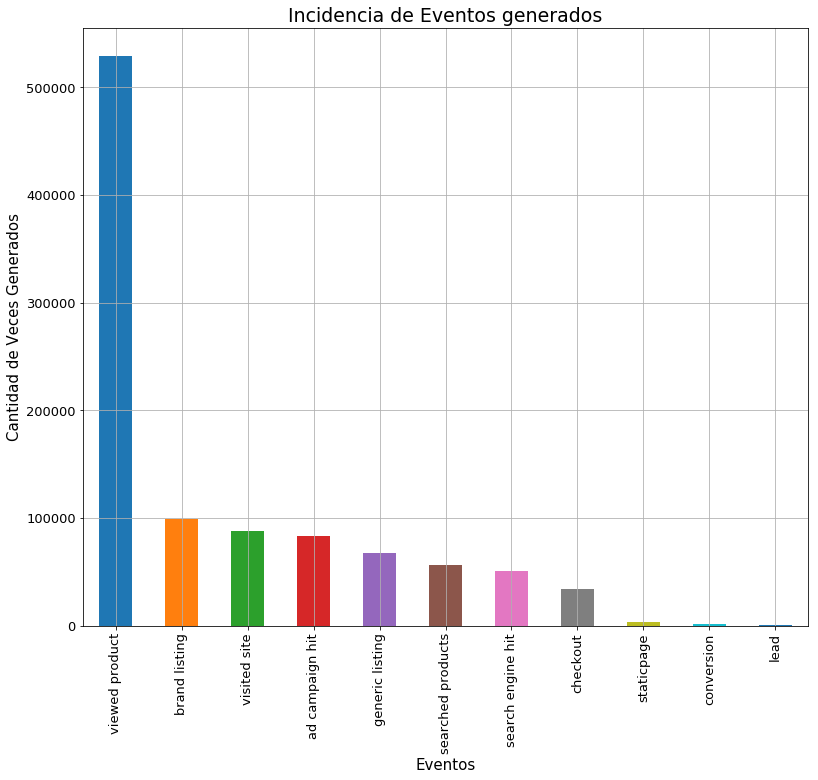

In [10]:
#Generamos el grafico.
graf = eventos.plot(kind='bar', grid=True, figsize=(13, 11),fontsize=13)
graf.set_title("Incidencia de Eventos generados", fontsize=19)
graf.set_ylabel("Cantidad de Veces Generados", fontsize=15)
graf.set_xlabel("Eventos", fontsize=15)
plt.show()

### Observaciones.
---
La vista sugiere 52% es la visualización del producto. Por otro lado, tenemos una generación de checkout del 3.34% y eso se reduce en un 0.12%.

## Busqueda del producto con más conversiones

In [11]:
#primero localizo las conversiones para posteriormente agruparlas y contarlas.
df_filtrado = df_trocafone.loc[df_trocafone['event'] == 'conversion',:]
#Traigo tres columnas por la diferencia entre el primer producto y el segundo es el campo 'condition'.
sku_conversion = df_filtrado.groupby(['sku', 'model','condition']).agg({'event':'count'}).sort_values('event',ascending=False).head(5)
sku_conversion 

,,,event
sku,model,condition,
6371.0,Samsung Galaxy J5,Bom,30
6370.0,Samsung Galaxy J5,Muito Bom,18
7631.0,Motorola Moto G3 4G,Bom,17
2692.0,iPhone 5s,Bom,16
3371.0,Samsung Galaxy S6 Flat,Bom,14


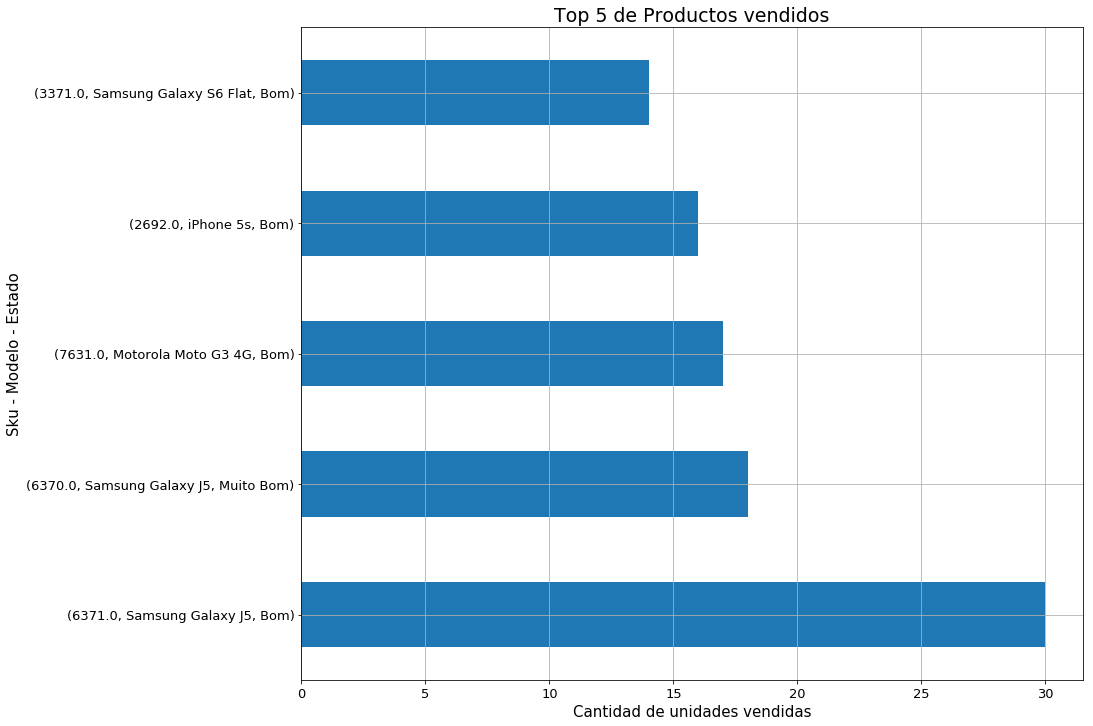

In [12]:
graf_sku_conversion = sku_conversion.plot(kind='barh', grid=True, figsize=(14, 12),fontsize=13, legend=False)
graf_sku_conversion.set_title("Top 5 de Productos vendidos", fontsize=19)
graf_sku_conversion.set_ylabel("Sku - Modelo - Estado", fontsize=15)
graf_sku_conversion.set_xlabel("Cantidad de unidades vendidas", fontsize=15)
plt.show()

### Observación
---

l más comprado definitivamente es el Samsung Galaxy J5, al margen de estar en la primera posición también se 
encuentra en la segunda posición con un estado distinto.

### Usuarios que realizaron más Eventos.

In [13]:
top_ten_user = df_trocafone['person'].value_counts().head(10)
i = 0
qty_event_ten_user = 0
while(i<10):
    print("posicion: {}) El usuario: {} registra una actividad de {} eventos.".format(i+1, 
                                                                                      top_ten_user.index[i], 
                                                                                      top_ten_user[i]))
    qty_event_ten_user += top_ten_user[i]
    i +=1

top_ten_user_df = top_ten_user.to_frame()

posicion: 1) El usuario: 71492f2b registra una actividad de 2771 eventos.
posicion: 2) El usuario: 6b07be7b registra una actividad de 2770 eventos.
posicion: 3) El usuario: 285101a1 registra una actividad de 2140 eventos.
posicion: 4) El usuario: 3e34b3cf registra una actividad de 1877 eventos.
posicion: 5) El usuario: 2d5a84c1 registra una actividad de 1800 eventos.
posicion: 6) El usuario: 5f25cb5d registra una actividad de 1797 eventos.
posicion: 7) El usuario: 5af7e2bc registra una actividad de 1773 eventos.
posicion: 8) El usuario: 3b5a5833 registra una actividad de 1705 eventos.
posicion: 9) El usuario: d7e60792 registra una actividad de 1352 eventos.
posicion: 10) El usuario: cd6e0b8d registra una actividad de 1254 eventos.


In [14]:
total_eventos =  sum(df_trocafone['person'].value_counts())
print("Los primeros 10 usuarios suman: {} eventos contra un total de: {} eventos, la participacion es de: {:.2f}%".format(qty_event_ten_user,  total_eventos,  (qty_event_ten_user/total_eventos*100)))

Los primeros 10 usuarios suman: 19239 eventos contra un total de: 1011288 eventos, la participacion es de: 1.90%


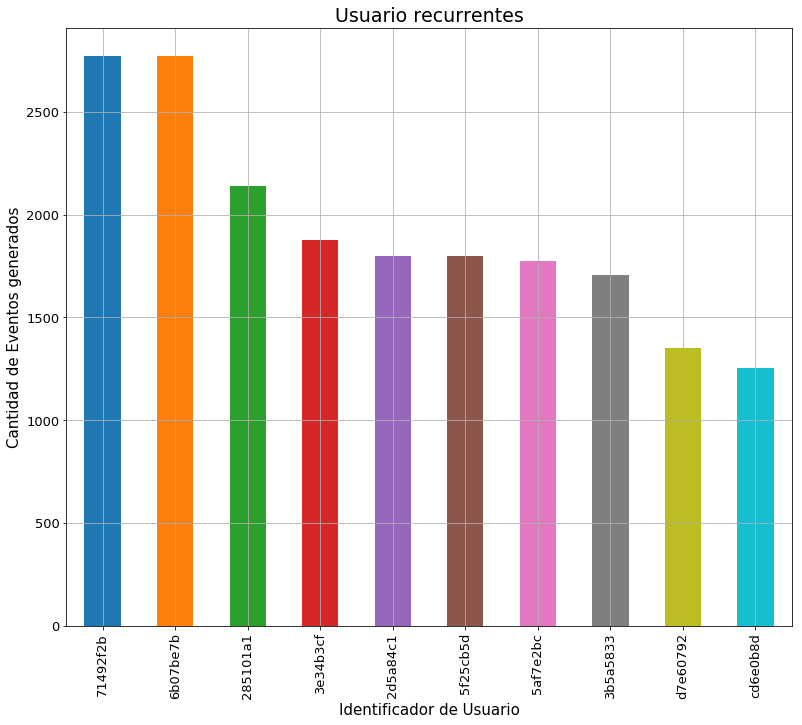

In [15]:
graf_user = top_ten_user.plot(kind='bar', grid=True, figsize=(13, 11),fontsize=13)
graf_user.set_title("Usuario recurrentes", fontsize=19)
graf_user.set_ylabel("Cantidad de Eventos generados", fontsize=15)
graf_user.set_xlabel("Identificador de Usuario", fontsize=15)
plt.show()

### Observaciones
---

La cantidad de interacciones de los usuarios varian casi a la mitad entre la primer posición y la última. Y la participación total de estos diez usuarios sobre toda la población es de 1.90%